<a href="https://colab.research.google.com/github/syedaquib153/syedaquib-GTD-analysis/blob/main/Global_Terrorism_Analysis_by_Aquib_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

**Introduction**

Information on more than 180,000 Terrorist Attacks

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

**Definition of terrorism**:

"The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation."

**About dataset:**

Size: (181691, 135)

Geography: Worldwide

Time period: 1970-2017, except 1993

Unit of analysis: Attack

Variables: >100 variables on location, tactics, perpetrators, targets, and outcomes.

Access this link to know detail of columns: https://start.umd.edu/gtd/downloads/Codebook.pdf

**☆ HIGHLIGHTS:**

Overview of the whole world

Know terrorist trends and regional differences

Be able to answer the big question posed in the end

**☆ CHALLENGE:**

Understand the meaning of the columns.

Find the right chart to show the change of trends across each region.

Thinking about big question for analysis

Find an approach to analyze and answer the big question.

Some difficulties in coding, drawing maps.

Importing Python Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Installing the geopandas to represent the world map 

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 9.1 MB/s 
     |████████████████████████████████| 6.3 MB 23.3 MB/s 
     |████████████████████████████████| 16.7 MB 225 kB/s 


Installing folium for graphical representation of worldmap

In [ ]:
pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
import folium

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/excel/Global Terrorism Data.csv",encoding=' ISO-8859-5',low_memory=False)

we have read a CSV files and Encoded it to read it. 

In [ ]:
list(df.columns)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

Data cleaning ,We used columns only which are required for the Analysis

In [ ]:
columns_we_required=['iyear','country_txt','region_txt','city','location','attacktype1_txt','latitude','longitude','crit1','crit2','crit3','success','suicide','attacktype1',
                     'targtype1_txt','target1','natlty1_txt','gname','motive','weaptype1_txt','nkill','propextent_txt']


Head of the columns we required 

In [ ]:
df=df[columns_we_required]
df

,iyear,country_txt,region_txt,city,location,attacktype1_txt,latitude,longitude,crit1,crit2,...,suicide,attacktype1,targtype1_txt,target1,natlty1_txt,gname,motive,weaptype1_txt,nkill,propextent_txt
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,NaN,Assassination,18.456792,-69.951164,1,1,...,0,1,Private Citizens & Property,Julio Guzman,Dominican Republic,MANO-D,NaN,Unknown,1.0,NaN
1,1970,Mexico,North America,Mexico city,NaN,Hostage Taking (Kidnapping),19.371887,-99.086624,1,1,...,0,6,Government (Diplomatic),"Nadine Chaval, daughter",Belgium,23rd of September Communist League,NaN,Unknown,0.0,NaN
2,1970,Philippines,Southeast Asia,Unknown,NaN,Assassination,15.478598,120.599741,1,1,...,0,1,Journalists & Media,Employee,United States,Unknown,NaN,Unknown,1.0,NaN
3,1970,Greece,Western Europe,Athens,NaN,Bombing/Explosion,37.997490,23.762728,1,1,...,0,3,Government (Diplomatic),U.S. Embassy,United States,Unknown,NaN,Explosives,NaN,NaN
4,1970,Japan,East Asia,Fukouka,NaN,Facility/Infrastructure Attack,33.580412,130.396361,1,1,...,0,7,Government (Diplomatic),U.S. Consulate,United States,Unknown,NaN,Incendiary,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,Somalia,Sub-Saharan Africa,Ceelka Geelow,The incident occurred near the town of Balcad.,Armed Assault,2.359673,45.385034,1,1,...,0,2,Military,Checkpoint,Somalia,Al-Shabaab,NaN,Firearms,1.0,NaN
181687,2017,Syria,Middle East & North Africa,Jableh,The incident occurred at the Humaymim Airport.,Bombing/Explosion,35.407278,35.942679,1,1,...,0,3,Military,Hmeymim Air Base,Russia,Muslim extremists,NaN,Explosives,2.0,Unknown
181688,2017,Philippines,Southeast Asia,Kubentog,The incident occurred in the Datu Hoffer distr...,Facility/Infrastructure Attack,6.900742,124.437908,1,1,...,0,7,Private Citizens & Property,Houses,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),NaN,Incendiary,0.0,Unknown
181689,2017,India,South Asia,Imphal,The incident occurred in the Mantripukhri neig...,Bombing/Explosion,24.798346,93.940430,1,1,...,0,3,Government (General),Office,India,Unknown,NaN,Explosives,0.0,NaN


Renamed Columns in the Data Frame by using syntax . rename() as a Dictionary 

In [ ]:
df=df.rename(columns={'iyear':'Year','country_txt':'Country','region_txt':'Region',
                             'natlty1_txt':'Nationality','city':'City','attacktype1_txt':'Attack','targtype1_txt':'Target_type',
                             'targsubtype1_txt':'Target_subtype','target1':'Target','gname':'Gang_name','weaptype1_txt':'Weapon_type'})

df


,Year,Country,Region,City,location,Attack,latitude,longitude,crit1,crit2,...,suicide,attacktype1,Target_type,Target,Nationality,Gang_name,motive,Weapon_type,nkill,propextent_txt
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,NaN,Assassination,18.456792,-69.951164,1,1,...,0,1,Private Citizens & Property,Julio Guzman,Dominican Republic,MANO-D,NaN,Unknown,1.0,NaN
1,1970,Mexico,North America,Mexico city,NaN,Hostage Taking (Kidnapping),19.371887,-99.086624,1,1,...,0,6,Government (Diplomatic),"Nadine Chaval, daughter",Belgium,23rd of September Communist League,NaN,Unknown,0.0,NaN
2,1970,Philippines,Southeast Asia,Unknown,NaN,Assassination,15.478598,120.599741,1,1,...,0,1,Journalists & Media,Employee,United States,Unknown,NaN,Unknown,1.0,NaN
3,1970,Greece,Western Europe,Athens,NaN,Bombing/Explosion,37.997490,23.762728,1,1,...,0,3,Government (Diplomatic),U.S. Embassy,United States,Unknown,NaN,Explosives,NaN,NaN
4,1970,Japan,East Asia,Fukouka,NaN,Facility/Infrastructure Attack,33.580412,130.396361,1,1,...,0,7,Government (Diplomatic),U.S. Consulate,United States,Unknown,NaN,Incendiary,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,Somalia,Sub-Saharan Africa,Ceelka Geelow,The incident occurred near the town of Balcad.,Armed Assault,2.359673,45.385034,1,1,...,0,2,Military,Checkpoint,Somalia,Al-Shabaab,NaN,Firearms,1.0,NaN
181687,2017,Syria,Middle East & North Africa,Jableh,The incident occurred at the Humaymim Airport.,Bombing/Explosion,35.407278,35.942679,1,1,...,0,3,Military,Hmeymim Air Base,Russia,Muslim extremists,NaN,Explosives,2.0,Unknown
181688,2017,Philippines,Southeast Asia,Kubentog,The incident occurred in the Datu Hoffer distr...,Facility/Infrastructure Attack,6.900742,124.437908,1,1,...,0,7,Private Citizens & Property,Houses,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),NaN,Incendiary,0.0,Unknown
181689,2017,India,South Asia,Imphal,The incident occurred in the Mantripukhri neig...,Bombing/Explosion,24.798346,93.940430,1,1,...,0,3,Government (General),Office,India,Unknown,NaN,Explosives,0.0,NaN


Calculated Sum() of null values

In [ ]:
df.isnull().sum()

Year                   0
Country                0
Region                 0
City                 434
location          126196
Attack                 0
latitude            4556
longitude           4557
crit1                  0
crit2                  0
crit3                  0
success                0
suicide                0
attacktype1            0
Target_type            0
Target               636
Nationality         1559
Gang_name              0
motive            131130
Weapon_type            0
nkill              10313
propextent_txt    117626
dtype: int64

Replaced all the null values with Zeroes present in Columns

In [ ]:
df.replace(np.nan,0)

,Year,Country,Region,City,location,Attack,latitude,longitude,crit1,crit2,...,suicide,attacktype1,Target_type,Target,Nationality,Gang_name,motive,Weapon_type,nkill,propextent_txt
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,0,Assassination,18.456792,-69.951164,1,1,...,0,1,Private Citizens & Property,Julio Guzman,Dominican Republic,MANO-D,0,Unknown,1.0,0
1,1970,Mexico,North America,Mexico city,0,Hostage Taking (Kidnapping),19.371887,-99.086624,1,1,...,0,6,Government (Diplomatic),"Nadine Chaval, daughter",Belgium,23rd of September Communist League,0,Unknown,0.0,0
2,1970,Philippines,Southeast Asia,Unknown,0,Assassination,15.478598,120.599741,1,1,...,0,1,Journalists & Media,Employee,United States,Unknown,0,Unknown,1.0,0
3,1970,Greece,Western Europe,Athens,0,Bombing/Explosion,37.997490,23.762728,1,1,...,0,3,Government (Diplomatic),U.S. Embassy,United States,Unknown,0,Explosives,0.0,0
4,1970,Japan,East Asia,Fukouka,0,Facility/Infrastructure Attack,33.580412,130.396361,1,1,...,0,7,Government (Diplomatic),U.S. Consulate,United States,Unknown,0,Incendiary,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,Somalia,Sub-Saharan Africa,Ceelka Geelow,The incident occurred near the town of Balcad.,Armed Assault,2.359673,45.385034,1,1,...,0,2,Military,Checkpoint,Somalia,Al-Shabaab,0,Firearms,1.0,0
181687,2017,Syria,Middle East & North Africa,Jableh,The incident occurred at the Humaymim Airport.,Bombing/Explosion,35.407278,35.942679,1,1,...,0,3,Military,Hmeymim Air Base,Russia,Muslim extremists,0,Explosives,2.0,Unknown
181688,2017,Philippines,Southeast Asia,Kubentog,The incident occurred in the Datu Hoffer distr...,Facility/Infrastructure Attack,6.900742,124.437908,1,1,...,0,7,Private Citizens & Property,Houses,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),0,Incendiary,0.0,Unknown
181689,2017,India,South Asia,Imphal,The incident occurred in the Mantripukhri neig...,Bombing/Explosion,24.798346,93.940430,1,1,...,0,3,Government (General),Office,India,Unknown,0,Explosives,0.0,0


Information about the Data set we required to analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            181691 non-null  int64  
 1   Country         181691 non-null  object 
 2   Region          181691 non-null  object 
 3   City            181257 non-null  object 
 4   location        55495 non-null   object 
 5   Attack          181691 non-null  object 
 6   latitude        177135 non-null  float64
 7   longitude       177134 non-null  float64
 8   crit1           181691 non-null  int64  
 9   crit2           181691 non-null  int64  
 10  crit3           181691 non-null  int64  
 11  success         181691 non-null  int64  
 12  suicide         181691 non-null  int64  
 13  attacktype1     181691 non-null  int64  
 14  Target_type     181691 non-null  object 
 15  Target          181055 non-null  object 
 16  Nationality     180132 non-null  object 
 17  Gang_name 

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)

Text(0.5, 0, 'Attacks')

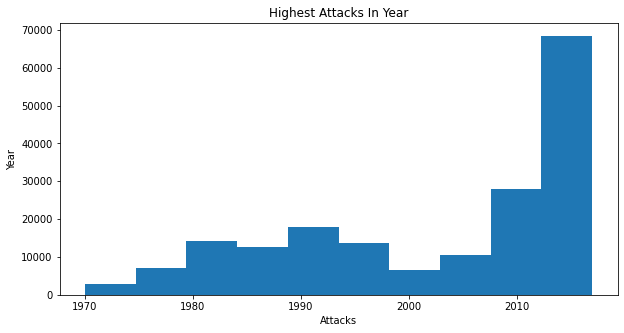

In [ ]:
year=df.Year.sort_values(axis=0,ascending=True)
year.plot(kind='hist')
plt.title('Highest Attacks In Year')
plt.ylabel('Year')
plt.xlabel('Attacks')

INFERENCE: The above  Bar graph represents the attacks took place inthe Year.
           It concluded that attacks has been gradually increases from 2012      to 2017

In [ ]:
country = df['Country'].value_counts()
country = country.reset_index()
country.rename(columns={'index': 'Country Name', 'Country': 'Number Of Incidents'}, inplace=True)

In [ ]:
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


My taking the concept of joins we have merged the data by inner join

In [ ]:

country= world.merge(country ,left_on='name',right_on='Country Name',how='inner')
country.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country Name,Number Of Incidents
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,17
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,59
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,96
3,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,27
4,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,21


In [ ]:
country['Number Of Incidents'].fillna(0, inplace=True)
country.isna().sum()

pop_est                0
continent              0
name                   0
iso_a3                 0
gdp_md_est             0
geometry               0
Country Name           0
Number Of Incidents    0
dtype: int64

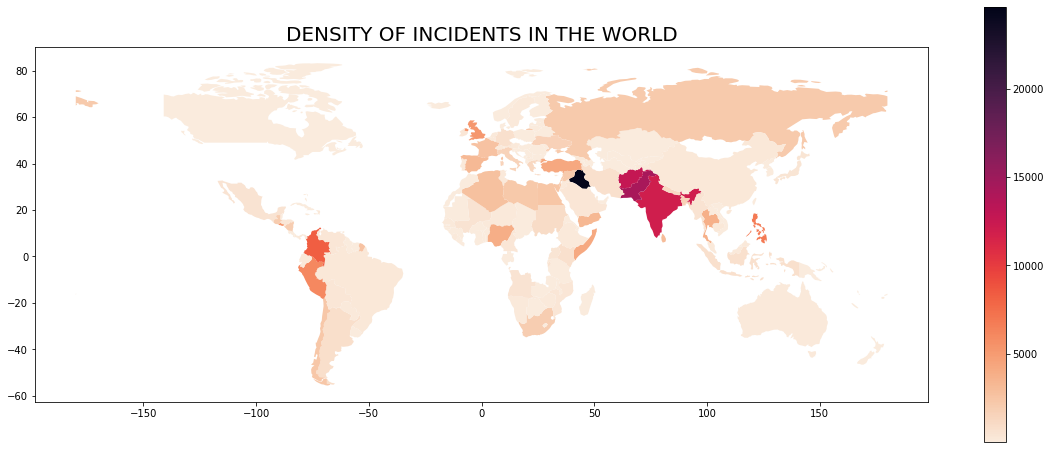

In [ ]:
country.plot('Number Of Incidents', cmap='rocket_r', legend=True, figsize=(20, 8))
plt.title('DENSITY OF INCIDENTS IN THE WORLD', fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(10,10));

<Figure size 720x720 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7f7d745de990>,
 [Text(0.7857785129536577, 0.7697740763239163, 'Iraq'),
  Text(-0.46003379503917613, 0.9991841208815588, 'Pakistan'),
  Text(-1.0550950330500464, 0.3110859547345747, 'Afghanistan'),
  Text(-0.9705026126165458, -0.5178075693773307, 'India'),
  Text(-0.47157142152288667, -0.9937909208696183, 'Colombia'),
  Text(0.03916882103405774, -1.0993024167438195, 'Philippines'),
  Text(0.473259188827646, -0.9929882880428141, 'Peru'),
  Text(0.7920971400527258, -0.7632706733002996, 'El Salvador'),
  Text(0.9976589322052719, -0.46333212169138116, 'United Kingdom'),
  Text(1.0899859849122417, -0.14808967788097394, 'Turkey')],
 [Text(0.428606461611086, 0.41987676890395426, '24.7%'),
  Text(-0.2509275245668233, 0.5450095204808502, '14.4%'),
  Text(-0.5755063816636616, 0.1696832480370407, '12.7%'),
  Text(-0.5293650614272067, -0.2824404923876349, '12.0%'),
  Text(-0.25722077537612, -0.5420677750197918, '8.3%'),
  Text(0.021364811473122403, -0.59961950004208

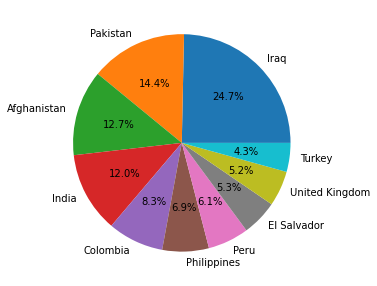

In [ ]:
countries=df.Country.value_counts()
plt.pie(list(df['Country'].value_counts().head(10)),labels=list(df['Country'].value_counts().head(10).keys()),autopct='%0.1f%%')


INTEFERENCE: The above graph represents highest attacks in the country.It concluded that the highest attacks in the countries such as Iraq,Pakistan,Afghanistan and India follwed by others. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


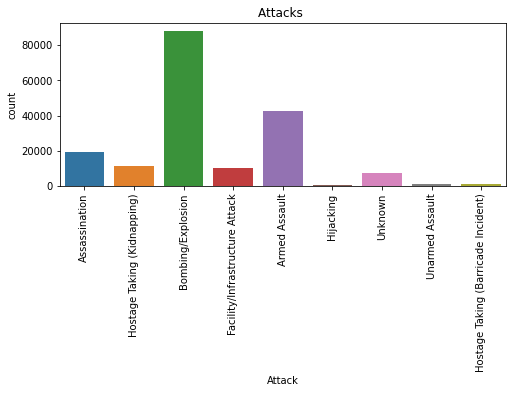

In [ ]:
plt.figure(figsize=(8,3));
plt.rcParams.update({'font.size':10});
plt.xticks(rotation = 90)
plt.title('Attacks ')
sns.countplot(df.Attack)


INFERENCE:The above graph shows the Count and Type of Attacks done by the Terrorist.
It concluded that terrorist have attacked more through Bombing/Explosion and by using Armed Assault.


In [ ]:
print(f"The maximum attack in the year is {df.Year.max()}")

The maximum attack in the year is 2017


In [ ]:
print(f"The regions which are affected in the attacks are \n{df['Region'].value_counts().head()}")

The regions which are affected in the attacks are 
Middle East & North Africa    50474
South Asia                    44974
South America                 18978
Sub-Saharan Africa            17550
Western Europe                16639
Name: Region, dtype: int64


In [ ]:
plt.rcParams['figure.figsize'] = (20, 8)

([<matplotlib.patches.Wedge at 0x7f7d75285590>,
 [Text(0.7035617546246961, 0.8455772332728804, 'Middle East & North Africa'),
  Text(-0.903695354285906, 0.6271640189313089, 'South Asia'),
  Text(-0.9630832646085804, -0.5314796566481913, 'South America'),
  Text(-0.46053738837412966, -0.9989521079158581, 'Sub-Saharan Africa'),
  Text(0.17735483717617673, -1.0856082450544542, 'Western Europe'),
  Text(0.6812468408423081, -0.8636566110685283, 'Southeast Asia'),
  Text(0.9619732941932078, -0.5334860647280941, 'Central America & Caribbean'),
  Text(1.0691747237275686, -0.2585834684237906, 'Eastern Europe'),
  Text(1.095753163551811, -0.09656606322201654, 'North America'),
  Text(1.0998932461911939, -0.015324718039755643, 'East Asia')],
 [Text(0.383760957068016, 0.4612239454215711, '27.9%'),
  Text(-0.4929247387014032, 0.342089464871623, '24.9%'),
  Text(-0.5253181443319529, -0.289897994535377, '10.5%'),
  Text(-0.25120221184043434, -0.5448829679541043, '9.7%'),
  Text(0.09673900209609639, -

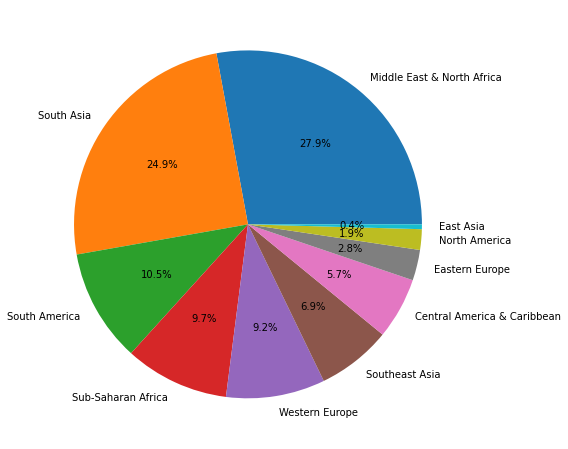

In [ ]:
region=df.Region.value_counts()
plt.pie(list(df['Region'].value_counts().head(10)),labels=list(df['Region'].value_counts().head(10).keys()),autopct='%0.1f%%')

INFERENCE:The Middle East and North Africa are the most affected Regions

Text(0, 0.5, 'Numberofperson')

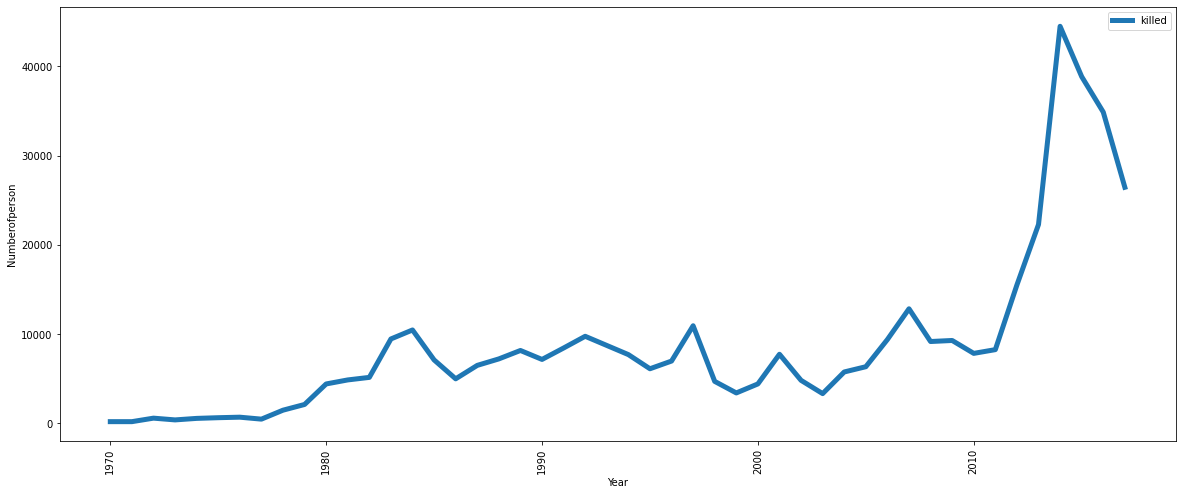

In [ ]:
Killed_year = df.groupby(["Year"])["nkill"].sum().reset_index(name ='Numberofperson')
sns.lineplot(x='Year', y='Numberofperson', data =Killed_year, linewidth = 5, label = "killed")
sns.set(rc = {'figure.figsize':(20,8)})
plt.xticks(rotation=90)
plt.ylabel("Numberofperson")



In [ ]:
df.nkill.sum()
print(f"The number of people killed during the attack ={df.loc[df['nkill'].idxmax()]}")

The number of people killed during the attack =Year                                                           2014
Country                                                        Iraq
Region                                   Middle East & North Africa
City                                                         Tikrit
location                                                        NaN
Attack                                  Hostage Taking (Kidnapping)
latitude                                                  34.621521
longitude                                                 43.668377
crit1                                                             1
crit2                                                             1
crit3                                                             0
success                                                           1
suicide                                                           0
attacktype1                                                       6
T

INFERENCE: The above describes about the attacks in the year

In [ ]:
df['motive'].fillna('unknow',inplace=True)
df.drop(df[df['motive']=='unknow'].index,inplace=True)

Filled all 'nan' object as 'unknow' since the motive was declared as unknow itself

In [ ]:
df_motive=df.motive.head(15)

In [ ]:
df['motive'].head(100)

5         To protest the Cairo Illinois Police Deparment
8            To protest the War in Vietnam and the draft
9            To protest the War in Vietnam and the draft
11                     Protest the draft and Vietnam War
14     To protest United States owned businesses in P...
                             ...                        
207    To intimidate/show dissatisfaction with White ...
208    To coerce the government to free the Panther 2...
209    This attack occurred during heightened racial ...
211    Bank of America was perceived to symbolize the...
218    To cripple the telecommunications facilities o...
Name: motive, Length: 100, dtype: object

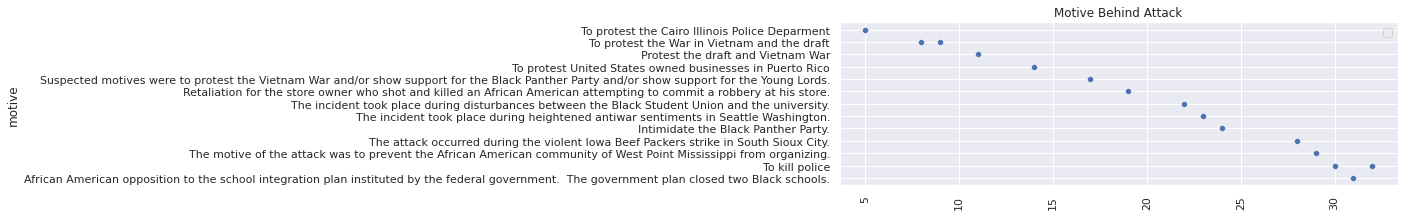

In [ ]:
plt.figure(figsize=(10,3));
plt.rcParams.update({'font.size':10});
plt.xticks(rotation = 90)
plt.title('Motive Behind Attack')
plt.legend(df_motive)
sns.scatterplot(data=df_motive);

INFERENCE: The above information gives us the motive behind the attack/war. The major part of motive was"Unknow","To protest the cairo lllinois plice department","To protest the War in Vietnam and the draft"
               

In [ ]:
df.Weapon_type.replace({"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)" : "Vehicle"}, inplace=True) 

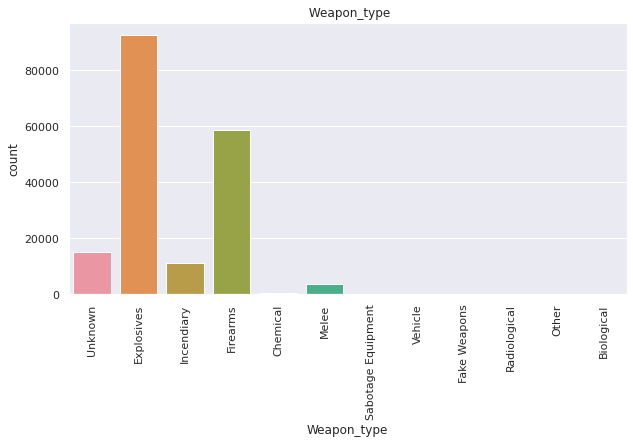

In [ ]:
plt.figure(figsize=(10,5));
plt.rcParams.update({'font.size':12});
plt.xticks(rotation = 90)
plt.title(' Weapon_type')
sns.countplot(x=df.Weapon_type);


INFERENCE: The Major Weapon_type used during the attack was"Explosives" and "Firearms"

In [ ]:
Target = df['Target_type'].value_counts(normalize=True) * 100
Target = Target.reset_index()
Target.rename(columns={'index': 'Target', 'Target_type': 'Percentage Of Incidents (%)'}, inplace=True)
Target

,Target,Percentage Of Incidents (%)
0,Private Citizens & Property,23.947801
1,Military,15.401974
2,Police,13.487735
3,Government (General),11.713844
4,Business,11.375907
5,Transportation,3.742068
6,Utilities,3.314969
7,Unknown,3.246171
8,Religious Figures/Institutions,2.443709
9,Educational Institution,2.378764


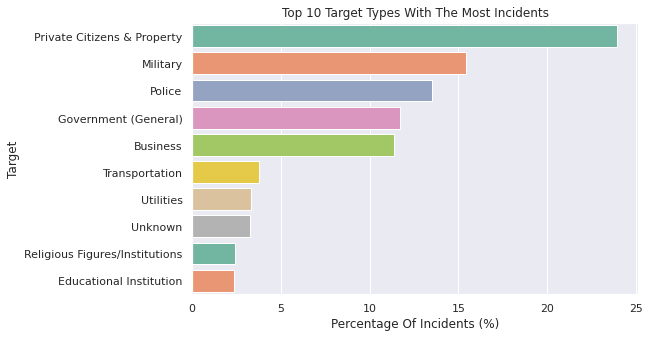

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=Target [:10],
              x='Percentage Of Incidents (%)',
              y='Target',
              orient='h',
              palette='Set2')
plt.title('Top 10 Target Types With The Most Incidents')


plt.show()

INFERENCE:The most common Target was mainly the Private Citizens & Property and Military sectors

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)

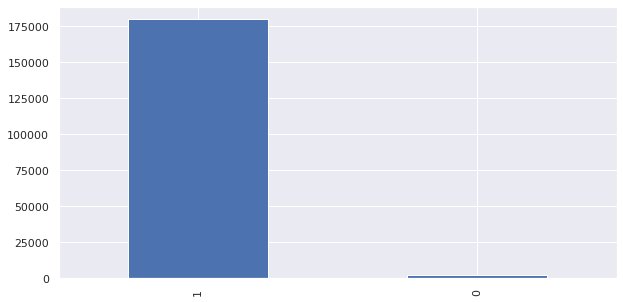

In [ ]:
df.crit1.value_counts().plot(kind="bar")

INFERENCE:From the graph it concluded that CRIT1(POLITICAL, ECONOMIC, RELIGIOUS, OR SOCIAL GOAL) are aimed during the attack.


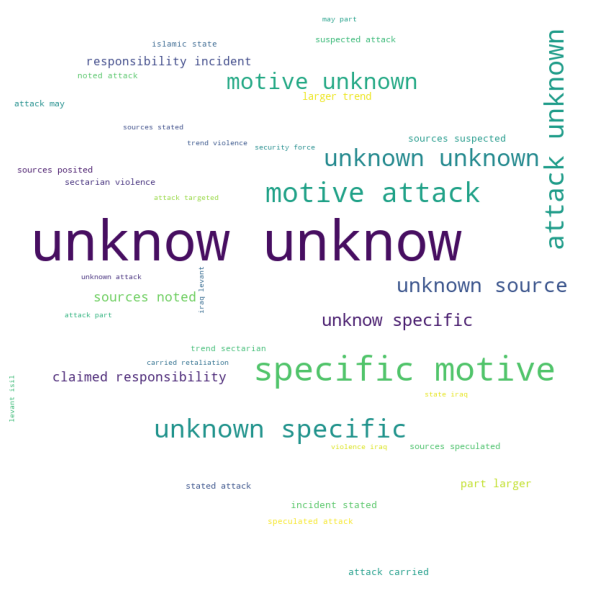

In [ ]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
for val in df.motive:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Here are some images of attacks.

**SUMMARY:**
The Global Terrorism Database (GTD)

The GTD Analysis was done by the 5 members of group-Syed Aquib,Ganesh Subramanian,Mayur Chulbhare,Abhishek kirar,Ajinkya Shingotte.
In this project we got Global Terrorism Analysis as a CSV file.

As soon as we downloaded the CSV file from Almabetter Dashboard we uploaded the file in colab notebook through the drive.we were having no idea about the project as this was a first project.
All the member in group were parcipated equally throughout the project.
As a team we read the data present inthe file and gone through the data in each columns detailed as individual.The data was huge which some of it was not needed for the analysis.

The data was cleaned and created the new dataframe were columns we required for the analysis.Each and every columns were compared to gain the knowledge about the data.Worked individually gaining some insights doing some EDA.
The first problem we faced was the name of the columns and nan values present inthe data.We renamed the columns by using a dictionary format, we replaced all nan values to Zero in int dtype and unknown in object dtype by using .replace syntax. By getting info of dataframe we plotted graphs for each data to understand and visualized thoroughly.From graphs we cleared that what kind of attacks were attacked.which country,state and region the most attacks were done.which gang and name of gang was involued during the attacks.type of attack and no of people killed during the attack. the motive behind the attack also been confirmed through the data presents.the diffirent types of weapons were found using during the attack.

**CONCLUSIONS:**




*   The year which maximum attacks took place was during the year 2017.
     the attacks were seen gradually increasing from 2014 to 2017
*   The country which was attacked the most are Iraq,Pakistan,Afghanistan and India

*   Different kind of attacks were done .The major was through Bombing/Explosion and  Armed Asult.


*   The Middle East and North Africa were the region with highest count of attacks.
*   Overall 171378 people were killed during the attack and Iraq country has the highest count of people killed.


*   The motive behind the attacks were some unknown and some of them known such as "Protest the Vietnam War and the R.O.T.C."&"Protest the War in Vietnam and sabotage the draft"
*   The Explosives,Firearms,Incendairy were weapons used in attacks and the main aim to  them was CRIT1(POLITICAL, ECONOMIC, RELIGIOUS, OR SOCIAL GOAL) 






